In [184]:
# Importing necessary libraries for statistical analysis and graphing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud

# Importing required libraries for textual analysis
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Importing necessary libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB

# Importing Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Importing additional libraries for various usage
import string
import random
import pickle


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jrottier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jrottier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [185]:
# Dataset Citation
'''@misc{zachary_grinberg_2024,
	title={Human vs. LLM Text Corpus},
	url={https://www.kaggle.com/dsv/7378735},
	DOI={10.34740/KAGGLE/DSV/7378735},
	publisher={Kaggle},
	author={Zachary Grinberg},
	year={2024}
}'''

'@misc{zachary_grinberg_2024,\n\ttitle={Human vs. LLM Text Corpus},\n\turl={https://www.kaggle.com/dsv/7378735},\n\tDOI={10.34740/KAGGLE/DSV/7378735},\n\tpublisher={Kaggle},\n\tauthor={Zachary Grinberg},\n\tyear={2024}\n}'

In [186]:
# Reading in the datafile
text_df = pd.read_csv('Data/data.csv')

In [187]:
# Formatting the data

# Changing all non-human sources to be 'AI Generated'
def change_ai(val):
    return 'AI Generated' if val != 'Human' else val
text_df['source'] = text_df['source'].apply(change_ai)

# Changing all human sources to be 'Human Content'
def change_human(val):
    return 'Human Content' if val == 'Human' else val
text_df['source'] = text_df['source'].apply(change_human)

# Calculating the number of texts for each format
hc = sum(text_df['source']=='Human Content')
ai = sum(text_df['source']=='AI Generated')

# Dropping Unnecessary Columns
text_df.drop(columns=['prompt_id', 'text_length', 'word_count'], inplace=True)

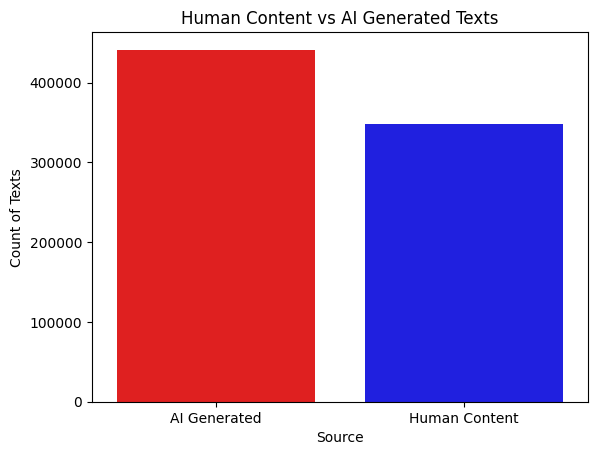

In [188]:
# Visualizing the Distribution of the data
custom_palette = {"AI Generated": "red", "Human Content": "blue"}
ax = sns.countplot(data=text_df,x='source', hue='source', legend=False, palette=custom_palette)
ax.set_xlabel('Source')
ax.set_ylabel('Count of Texts')
ax.set_title('Human Content vs AI Generated Texts')
plt.show()

In [189]:
# Printing out summary data
print(f"{hc} pieces of text are Human Content")
print(f"{ai} pieces of text are AI Generated")
print(f"There are {hc+ai} pieces of text in total")

347692 pieces of text are Human Content
441230 pieces of text are AI Generated
There are 788922 pieces of text in total


In [190]:
# Creating Sample Dataframes for Human and AI Text

# Choosing a random state for consistency
rs = random.randint(1, 10000)

# Creating Filtered Dataframes
ai_df = text_df[text_df['source'] == 'AI Generated']
human_df = text_df[text_df['source'] == 'Human Content']

# Creating Sample Dataframes
ai_sample = ai_df.sample(n=5000, random_state=rs)
human_sample = human_df.sample(n=5000, random_state=rs)
text_sample = text_df.sample(n=150000, random_state=rs)

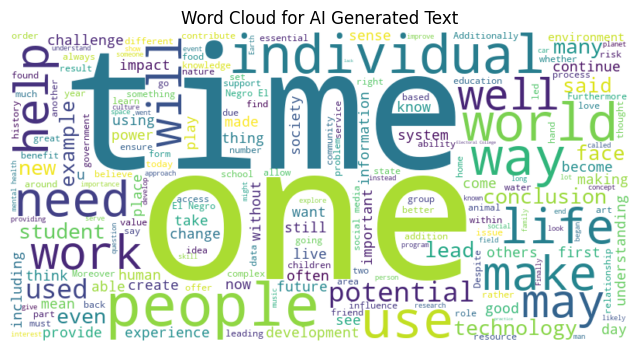

In [191]:
# Pulling only the text to form a string
ai_text = ' '.join(ai_sample['text'])

# Creating a WordCloud for the sample of AI Text
ai_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ai_text)

plt.figure(figsize=(8, 6))
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for AI Generated Text')
plt.axis('off')
plt.show()

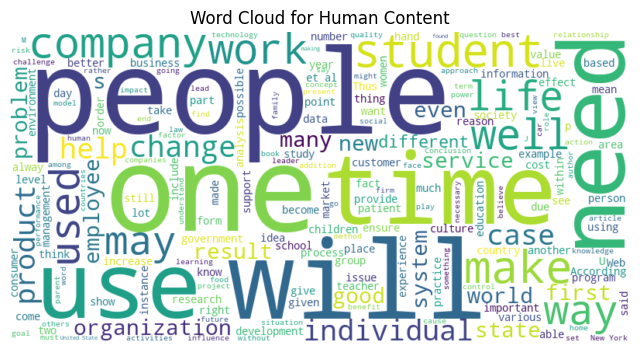

In [192]:
# Pulling only the text to form a string
human_text = ' '.join(human_sample['text'])

# Creating a WordCloud for the sample of Human Text
human_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(human_text)

plt.figure(figsize=(8, 6))
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Human Content')
plt.axis('off')
plt.show()

In [193]:
'''# Preprocessing the text for easier analysis - Removing Punctuation
def remove_punc(text):
    formatted_text = [char for char in text if char not in string.punctuation]
    formatted_text = ''.join(formatted_text)
    return formatted_text

text_sample['text']=text_sample['text'].apply(remove_punc)'''

"# Preprocessing the text for easier analysis - Removing Punctuation\ndef remove_punc(text):\n    formatted_text = [char for char in text if char not in string.punctuation]\n    formatted_text = ''.join(formatted_text)\n    return formatted_text\n\ntext_sample['text']=text_sample['text'].apply(remove_punc)"

In [194]:
'''# Preprocessing the text for easier analysis - Removing Stop Words
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

#text_sample['text'] = text_sample['text'].apply(remove_stopword)'''

"# Preprocessing the text for easier analysis - Removing Stop Words\nstop_words = set(stopwords.words('english'))\n\ndef remove_stopword(text):\n    words = word_tokenize(text)\n    filtered_words = [word for word in words if word.lower() not in stop_words]\n    filtered_text = ' '.join(filtered_words)\n    return filtered_text\n\n#text_sample['text'] = text_sample['text'].apply(remove_stopword)"

In [195]:
# Vectorizing the words for textual analysis
tfidf_vectorizer = TfidfVectorizer(max_features=7500)
tfidf_vectors = tfidf_vectorizer.fit_transform(text_sample['text'])
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [196]:
# Splitting the data for training
x = tfidf_df.values
y = text_sample['source'].values  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [197]:
# Encode string labels -- Human Content and AI Generated -- to numerical representation with LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [198]:
# Creating a neural network as the model
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.35),
    Dense(64, activation='relu'),
    Dropout(0.35),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [199]:
# Training the model
results = model.fit(x_train, y_train_encoded, epochs=25, batch_size=16, validation_data=(x_test, y_test_encoded), verbose=1)

Epoch 1/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 67s 8ms/step - accuracy: 0.7771 - loss: 0.4673 - val_accuracy: 0.8541 - val_loss: 0.3071
Epoch 2/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 56s 7ms/step - accuracy: 0.8747 - loss: 0.2774 - val_accuracy: 0.8658 - val_loss: 0.2817
Epoch 3/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 56s 7ms/step - accuracy: 0.8993 - loss: 0.2320 - val_accuracy: 0.8772 - val_loss: 0.2653
Epoch 4/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 54s 7ms/step - accuracy: 0.9235 - loss: 0.1892 - val_accuracy: 0.8830 - val_loss: 0.2585
Epoch 5/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 53s 7ms/step - accuracy: 0.9417 - loss: 0.1509 - val_accuracy: 0.8869 - val_loss: 0.2632
Epoch 6/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 53s 7ms/step - accuracy: 0.9577 - loss: 0.1183 - val_accuracy: 0.8891 - val_loss: 0.2767
Epoch 7/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 54s 7ms/step - accuracy: 0.9677 - loss: 0.0926 - val_accuracy: 0.8903 - val_loss: 0.2950
Epoch 8/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - accuracy: 0.9775 - loss: 0

In [200]:
# Saving the TF-IDF tokenizer for future usage
with open('tfidf_tokenizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Saving the model for future usage
model.save('text_classifier.keras')

In [201]:
# Creating predictions
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [202]:
# Testing the performance of the model against the testing dataset
sample_loss, sample_accuracy = model.evaluate(x_test, y_test_encoded)
print(f'Test Accuracy: {sample_accuracy:.4f}')

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8908 - loss: 0.6675
Test Accuracy: 0.8898


In [203]:
# Decoding the labels (0, 1) for readability
decoded_y_test = label_encoder.inverse_transform(y_test_encoded)
decoded_y_pred = label_encoder.inverse_transform(y_pred)

# Creating a classification report with custom labels
cr = classification_report(decoded_y_test, decoded_y_pred, target_names=label_encoder.classes_)
print(f"\n{cr}")

c:\Users\jrottier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



               precision    recall  f1-score   support

 AI Generated       0.87      0.94      0.90     16642
Human Content       0.92      0.82      0.87     13358

     accuracy                           0.89     30000
    macro avg       0.90      0.88      0.89     30000
 weighted avg       0.89      0.89      0.89     30000



In [204]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9621


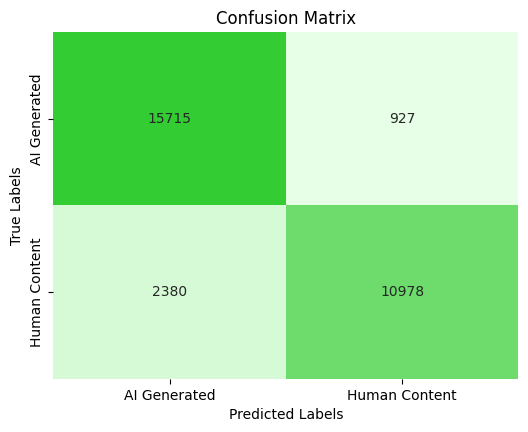

In [205]:
# Creating a numerical confusion matrix for this model
cm = confusion_matrix(y_test_encoded, y_pred)

# Define a custom colormapping for the heat map
colors = [(0.9, 1, 0.9), (0.2, 0.8, 0.2)]
n_bins = 100  
cmap_name = 'custom_green'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 4.5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False,
            xticklabels=['AI Generated', 'Human Content'],
            yticklabels=['AI Generated', 'Human Content'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()